In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
train = pd.read_csv('/content/Google_Stock_Price_Train.xls')
test = pd.read_csv('/content/Google_Stock_Price_Test.xls')

In [41]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [42]:
train.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)
test.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)

train['Close'] = train['Close'].str.replace(',', '').astype(float)

In [43]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1258.0,712.669666,164.752591,491.2,576.74,695.675,782.105,1216.83


In [44]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,20.0,807.9045,13.210088,786.14,802.2825,806.11,810.76,835.67


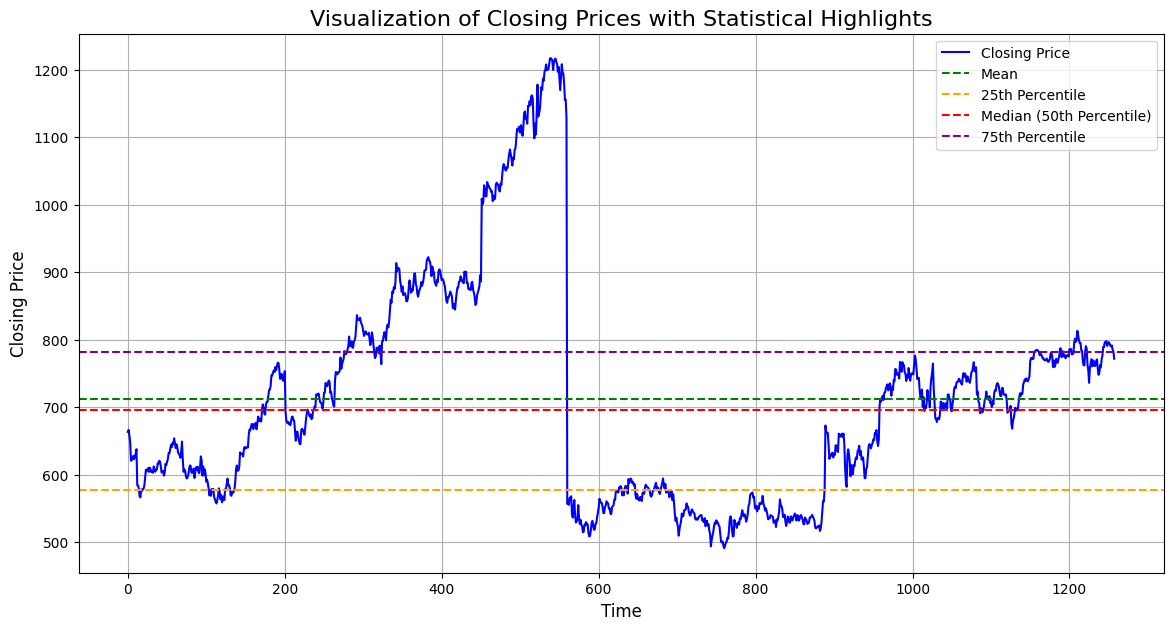

In [46]:
train_close = train['Close']
# Plotting the line plot
plt.figure(figsize=(14, 7))
plt.plot(train_close, color='blue', label='Closing Price')
# Adding statistical highlights
plt.axhline(np.mean(train_close), color='green', linestyle='--', linewidth=1.5, label='Mean')
plt.axhline(np.percentile(train_close, 25), color='orange', linestyle='--', linewidth=1.5, label='25th Percentile')
plt.axhline(np.median(train_close), color='red', linestyle='--', linewidth=1.5, label='Median (50th Percentile)')
plt.axhline(np.percentile(train_close, 75), color='purple', linestyle='--', linewidth=1.5, label='75th Percentile')
# Adding chart elements
plt.title("Visualization of Closing Prices with Statistical Highlights", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


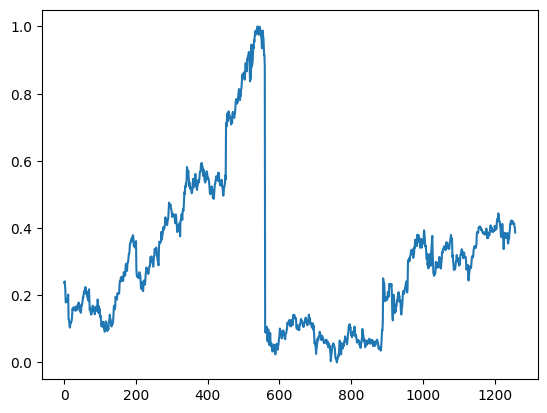

In [49]:
# Convert the 'Date' column to datetime objects if it's not already
train['Date'] = pd.to_datetime(train['Date'])

# Extract numerical features for scaling (exclude the 'Date' column)
numerical_features = train[['Close']]

# Apply MinMaxScaler to the numerical features only
train_scaled = scaler.fit_transform(numerical_features)

# If you need the scaled data in a DataFrame format:
train_scaled_df = pd.DataFrame(train_scaled, columns=['Close'], index=train.index)

# Now you can proceed with plotting or further analysis
plt.plot(train_scaled_df)
plt.show()

In [50]:
# We add first 50 locution to "X_train" and we 51. locution to "y_train" .
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

<a id="4"></a>
### RNN


In [51]:
# --- RNN ---

# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.4070
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.2986
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.2123
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.1765
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1171
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0856
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0738
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0567
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0483
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0421
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0348
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0306
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0294
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0231
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - lo

In [52]:
inputs = data[len(data) - len(test) - timesteps:]
# Select only the 'Open' column for scaling, excluding the 'Date' column
inputs = inputs[['Open']].values
inputs = scaler.transform(inputs)  # min max scaler

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [53]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0]) # 0 dan 50 ye, 1 den 51 e gibi kaydirarark 50 eleman aliyoruz
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [54]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


<a id="5"></a>
### Visualization of RNN


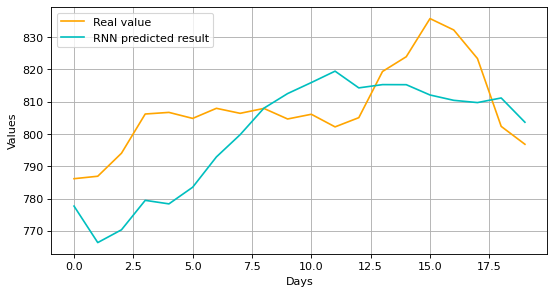

In [58]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
# Assuming 'Close' is the relevant column from your 'test' DataFrame
plt.plot(test.index, test['Close'], color="orange", label="Real value")
plt.plot(predicted_data, color="c", label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

<a id="6"></a>
### LSTM

In [59]:
# ------ LSTM --------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [61]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1))) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0103
Epoch 2/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0027
Epoch 3/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0028
Epoch 4/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0049
Epoch 5/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 5.9441e-04
Epoch 6/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0027
Epoch 7/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0018
Epoch 8/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 4.4160e-04
Epoch 9/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0014
Epoch 10/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 7.5705e-04
Epoch 11/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 5.2820e-04
Epoch 12/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 4.8084e-04
Epoch 13/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 5.5207e-04
Epoch 14/50
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 20s 11

In [62]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


<a id="7"></a>
### Visualization of LSTM

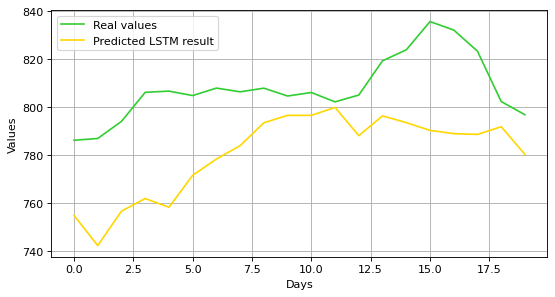

In [65]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
# Assuming 'Close' is the relevant column and 'Date' is the index from your 'test' DataFrame
plt.plot(test.index, test['Close'], color="LimeGreen", label="Real values")
plt.plot(test.index, predicted_data2, color="Gold", label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()


<a id="8"></a>
### Visualization of RNN vs LSTM

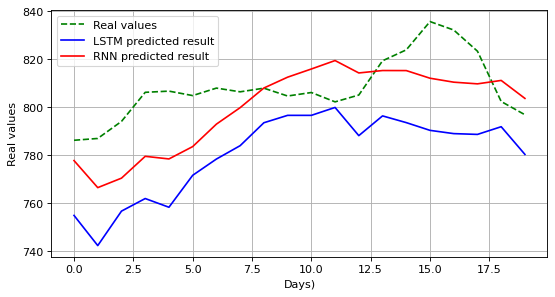

In [68]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
# Assuming 'Close' is the relevant column and 'Date' is the index from your 'test' DataFrame
plt.plot(test.index, test['Close'], color="green", linestyle='dashed',label="Real values")  # Changed this line
plt.plot(test.index, predicted_data2, color="blue", label="LSTM predicted result")
plt.plot(test.index, predicted_data, color="red",label="RNN predicted result") # ben ekledim
plt.legend()
plt.xlabel("Days)")
plt.ylabel("Real values")
plt.grid(True)
plt.show()

LSTM looks greatly successful from the RNN.

Now we change hyperparemeter like "units, number of layers, epochs, batch_size, activation" in RNN

<a id="9"></a>
### Modified RNN

In [ ]:
# RNN Modified

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()


regressor.add(SimpleRNN(units = 100,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 500, batch_size = 16)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0878
Epoch 2/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0092
Epoch 3/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0089
Epoch 4/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0061
Epoch 5/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0043
Epoch 6/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0042
Epoch 7/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0032
Epoch 8/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0031
Epoch 9/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0022
Epoch 10/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0030
Epoch 11/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0035
Epoch 12/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0022
Epoch 13/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0037
Epoch 14/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0020
Epoch 15/500
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0027
E

In [ ]:
predicted_data_modified = regressor.predict(X_test)
predicted_data_modified = scaler.inverse_transform(predicted_data_modified)


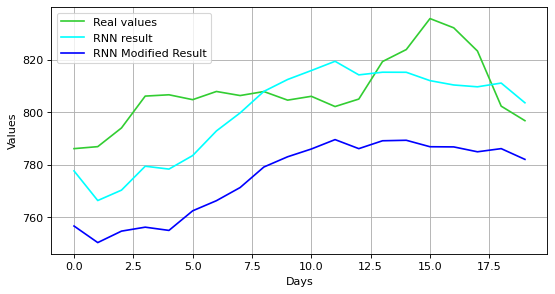

In [78]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test.index, test['Close'], color="LimeGreen", label="Real values")
plt.plot(predicted_data,color="cyan",label="RNN result")
plt.plot(predicted_data_modified,color="blue",label="RNN Modified Result")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

It looks Modified RNN more successful than RNN.

<a id="11"></a>
### Modified LSTM

In [71]:
#  LSTM Modified

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler


model = Sequential()
model.add(LSTM(10, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=200, batch_size=4) #degistirdim train leri RNN kilerle

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


302/302 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0789
Epoch 2/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0053
Epoch 3/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0042
Epoch 4/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0027
Epoch 5/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0044
Epoch 6/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0018
Epoch 7/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0019
Epoch 8/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0018
Epoch 9/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0017
Epoch 10/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0013
Epoch 11/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0019
Epoch 12/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0013
Epoch 13/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.3981e-04
Epoch 14/200
302/302 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 8.8498e-04
Epoch 15/200
302/302 ━━━━━━━━━━━━

In [72]:
predicted_data2_modified=model.predict(X_test)
predicted_data2_modified=scaler.inverse_transform(predicted_data2_modified)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


<a id="12"></a>
### Visualization of LSTM vs Modified LSTM

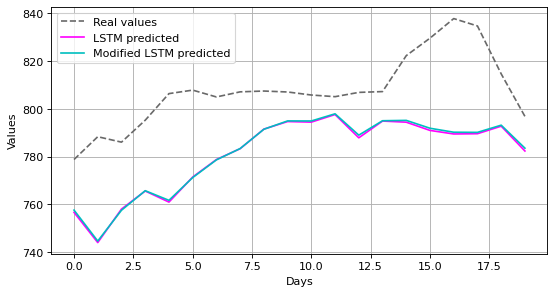

In [26]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="DimGray",label="Real values", linestyle="dashed")
plt.plot(predicted_data2,color="Magenta",label="LSTM predicted")
plt.plot(predicted_data2_modified,color="c", label="Modified LSTM predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()


Modified LSTM looks more successful than LSTM.

<a id="13"></a>
### Visualization of LSTM vs Modified LSTM vs RNN vs Modified RNN

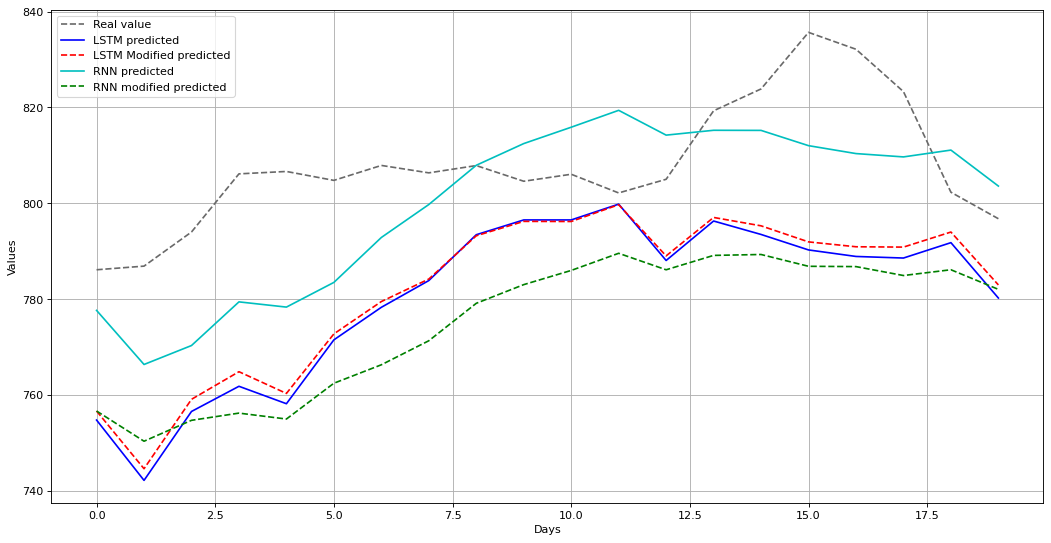

In [77]:
# visualization LSTM vs LSTM modified vs RNN vs RNN modified

plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
# Assuming 'Close' is the relevant column and 'Date' is the index from your 'test' DataFrame
plt.plot(test.index, test['Close'], color="DimGray",label="Real value", linestyle="dashed")  # Changed this line
plt.plot(test.index, predicted_data2, color="blue",label="LSTM predicted")
plt.plot(test.index, predicted_data2_modified, color="red", linestyle="dashed", label="LSTM Modified predicted")
plt.plot(test.index, predicted_data, color="c",label="RNN predicted")
plt.plot(test.index, predicted_data_modified, color="green", linestyle="dashed", label="RNN modified predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

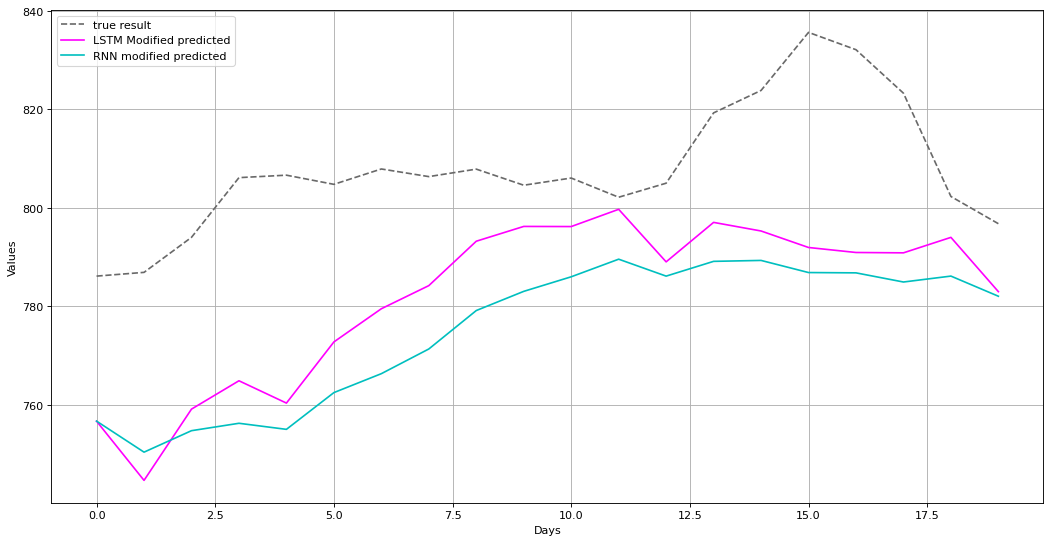

In [74]:
plt.figure(figsize=(16,8), dpi=80, facecolor='w', edgecolor='k')
# Assuming 'Close' is the relevant column and 'Date' is the index from your 'test' DataFrame
plt.plot(test.index, test['Close'], color="DimGray", linestyle= "dashed", label="true result")
plt.plot(test.index, predicted_data2_modified, color="Magenta",  label="LSTM Modified predicted")
plt.plot(test.index, predicted_data_modified, color="c",  label="RNN modified predicted")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()